In [1]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Setting a fixed random seed for reproducibility
torch.manual_seed(99)
random.seed(99)
np.random.seed(99)

# Device in which we will be working (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

cpu


In [2]:
# Loading the datasets
fashion_train = pd.read_csv("C:/CMI/MSc/SEM1/Project/dataset/fashion-mnist_train.csv")
fashion_test = pd.read_csv("C:/CMI/MSc/SEM1/Project/dataset/fashion-mnist_test.csv")

In [3]:
# Splitting data into features and labels
fashion_X_train = fashion_train.drop("label", axis = 1)
fashion_y_train = fashion_train["label"]
fashion_X_test = fashion_test.drop("label", axis = 1)
fashion_y_test = fashion_test["label"]


In [4]:
# Standardizing the data
scaler = StandardScaler()
fashion_X_train = scaler.fit_transform(fashion_X_train)
fashion_X_test = scaler.transform(fashion_X_test)


In [5]:
# Converting Pandas DataFrame to PyTorch tensors
fashion_X_train = torch.tensor(fashion_X_train, dtype = torch.float32)
fashion_y_train = torch.tensor(fashion_y_train, dtype = torch.long)
fashion_X_test = torch.tensor(fashion_X_test, dtype = torch.float32)
fashion_y_test = torch.tensor(fashion_y_test, dtype = torch.long)


In [6]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset = TensorDataset(fashion_X_train, fashion_y_train)
fashion_train_loader = DataLoader(fashion_train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
# Define our DNN model (for the Fashion MNIST)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  
        self.fc2 = nn.Linear(256, 128)  
        self.fc3 = nn.Linear(128, 10)   

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [8]:
# Obtaining the class labels from Kaggle
fashion_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}



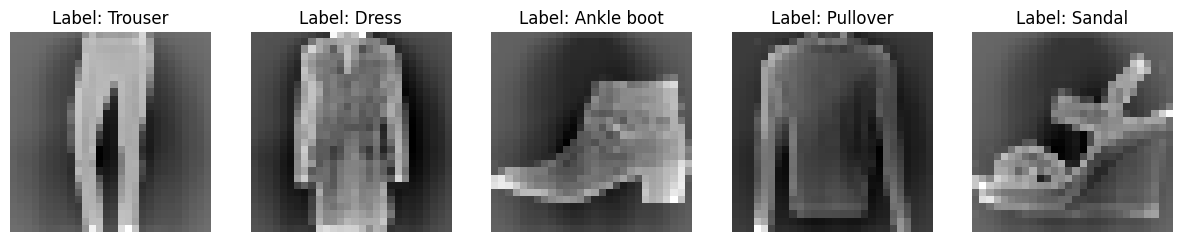

In [9]:
def plot_sample_images_fashion(data_loader, num_samples=5):
    # Get an iterator for the data loader
    data_iter = iter(data_loader)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Get and plot the sample images
    for i in range(num_samples):
        images, labels = next(data_iter)
        image = images[0].numpy()
        label = fashion_labels[labels[0].item()]
        
        # Reshape the image to its original shape (assuming it was flattened)
        if len(image.shape) == 1:
            image = image.reshape(28, 28)  # Change these dimensions if needed
            
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    plt.show()
# Example usage for your fashion_train_loader and sign_train_loader
plot_sample_images_fashion(fashion_train_loader, num_samples=5)



In [10]:
# Deploying the model on Fashion MNIST

model_1 = DNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)


# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_1.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_1(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader):.4f}')

Epoch [1/10] Loss: 0.4390
Epoch [2/10] Loss: 0.3264
Epoch [3/10] Loss: 0.2895
Epoch [4/10] Loss: 0.2603
Epoch [5/10] Loss: 0.2398
Epoch [6/10] Loss: 0.2215
Epoch [7/10] Loss: 0.2045
Epoch [8/10] Loss: 0.1878
Epoch [9/10] Loss: 0.1736
Epoch [10/10] Loss: 0.1653


In [11]:
# Evaluating our model on the test set
model_1.eval()
fashion_X_test, fashion_y_test = fashion_X_test.to(device), fashion_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_1(fashion_X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test).sum().item() / fashion_y_test.size(0)
    print(f'Test Accuracy of DNN on Fashion MNIST: {accuracy * 100:.2f}%')

Test Accuracy of DNN on Fashion MNIST: 89.44%


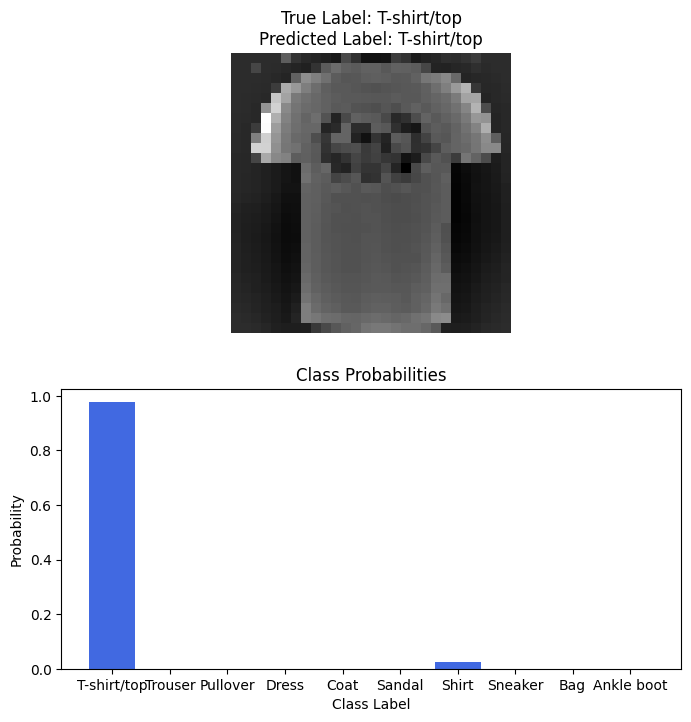

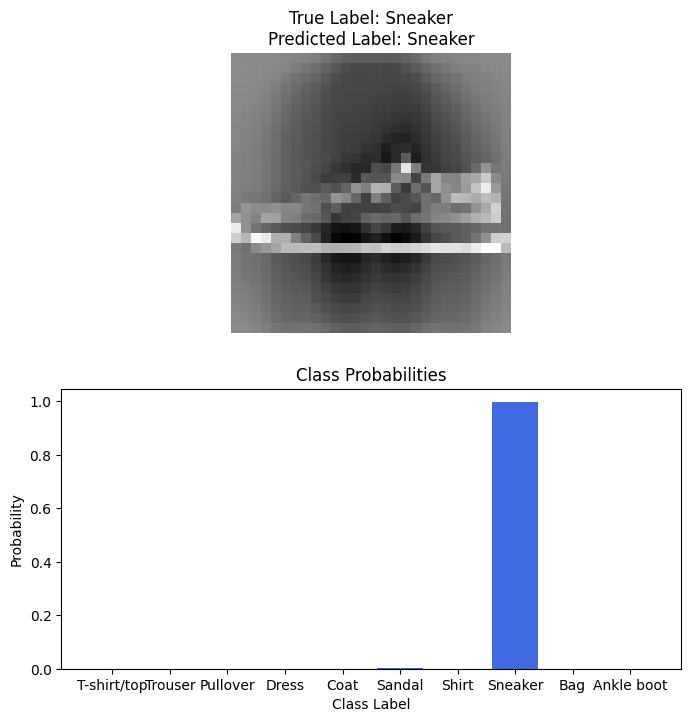

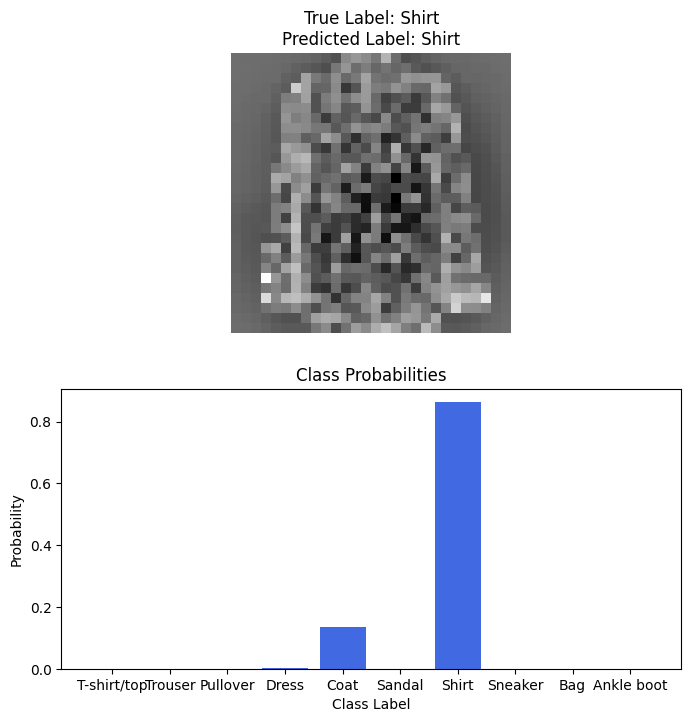

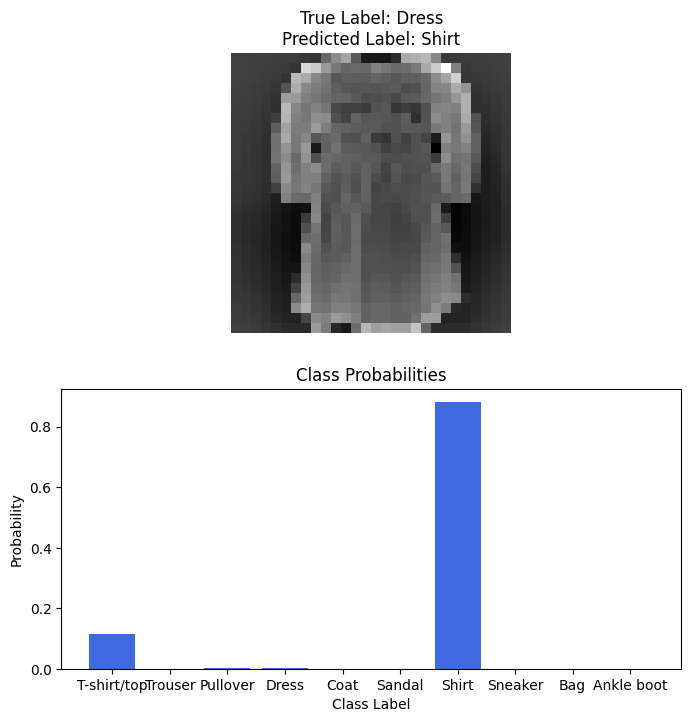

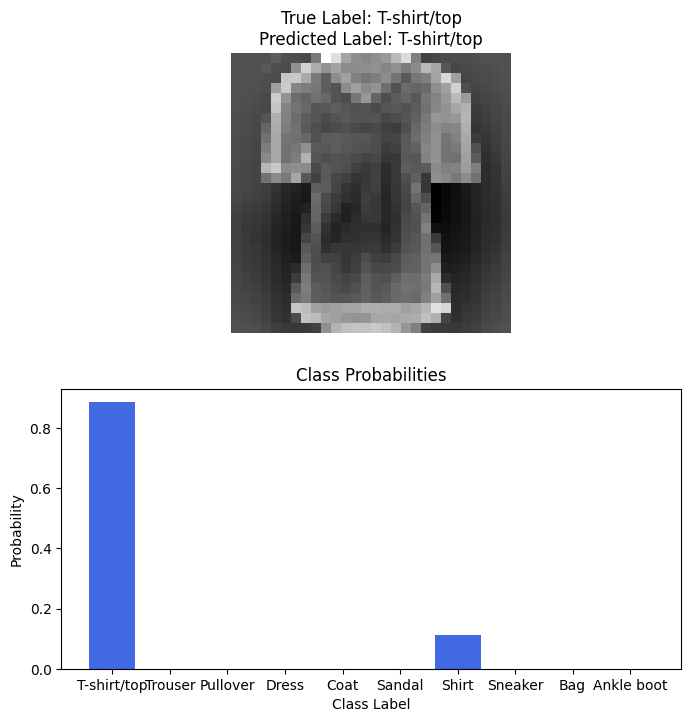

In [12]:
# Function to display a flattened image along with its predicted class and probability as a bar graph
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.reshape(28, 28)  # Reshape the flattened image to (28, 28)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
    plt.axis('off')
    
    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    
    plt.show()

# Set the model to evaluation mode
model_1.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(fashion_X_test), num_samples_to_display, replace=False)

class_labels = fashion_labels.values()# Replace with your list 'a'

for i in random_indices:
    image = fashion_X_test[i].cpu().numpy()  # Convert image tensor to NumPy array
    true_label = fashion_y_test[i].item()

    with torch.no_grad():
        test_output = model_1(fashion_X_test[i].unsqueeze(0))  # Model prediction for a single image
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, fashion_labels[true_label], fashion_labels[predicted_label], probabilities, class_labels)


In [13]:
fashion_X_train_cnn = fashion_X_train.view(-1, 1, 28, 28)
fashion_X_test_cnn = fashion_X_test.view(-1, 1, 28, 28)

In [14]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset_cnn = TensorDataset(fashion_X_train_cnn, fashion_y_train)
fashion_train_loader_cnn = DataLoader(fashion_train_dataset_cnn, batch_size=batch_size, shuffle=True)

In [15]:
class CNN(nn.Module): # For Fashion MNIST
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [16]:
# Deploying the model on the Fashion MNIST

model_5 = CNN(28*28, 10).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_5.parameters(), lr=0.001)

# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_5.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader_cnn:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_5(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader_cnn):.4f}')

Epoch [1/10] Loss: 0.5806
Epoch [2/10] Loss: 0.3798
Epoch [3/10] Loss: 0.3221
Epoch [4/10] Loss: 0.2856
Epoch [5/10] Loss: 0.2598
Epoch [6/10] Loss: 0.2385
Epoch [7/10] Loss: 0.2180
Epoch [8/10] Loss: 0.2023
Epoch [9/10] Loss: 0.1878
Epoch [10/10] Loss: 0.1730


In [17]:
# Evaluating our model on the test set
model_5.eval()
fashion_X_test_cnn, fashion_y_test = fashion_X_test_cnn.to(device), fashion_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_5(fashion_X_test_cnn)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test).sum().item() / fashion_y_test.size(0)
    print(f'Test Accuracy of CNN on Fashion MNIST: {accuracy * 100:.2f}%')

Test Accuracy of CNN on Fashion MNIST: 89.85%


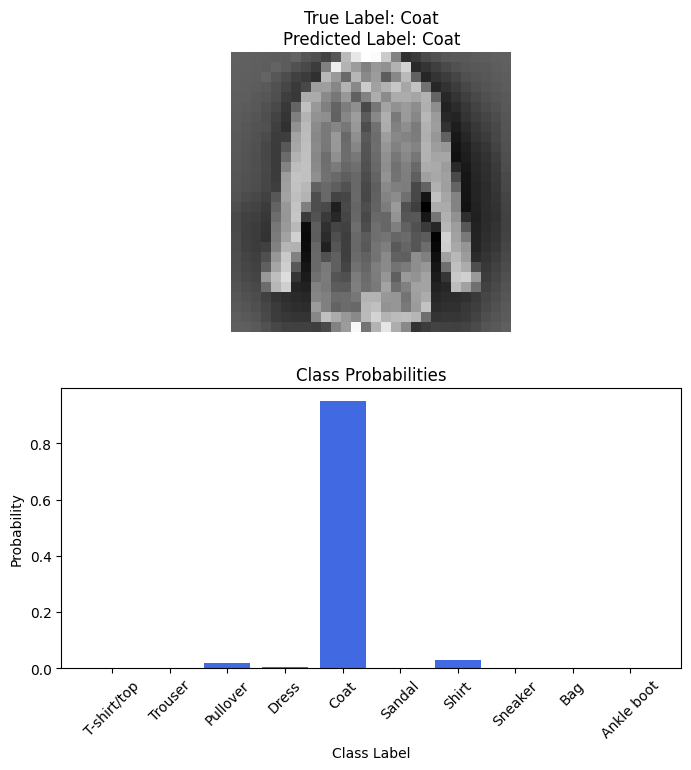

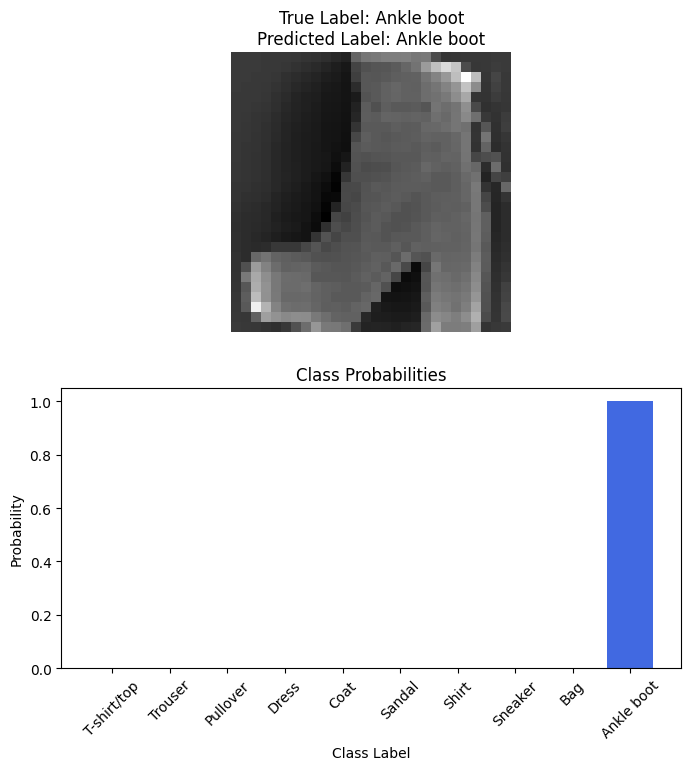

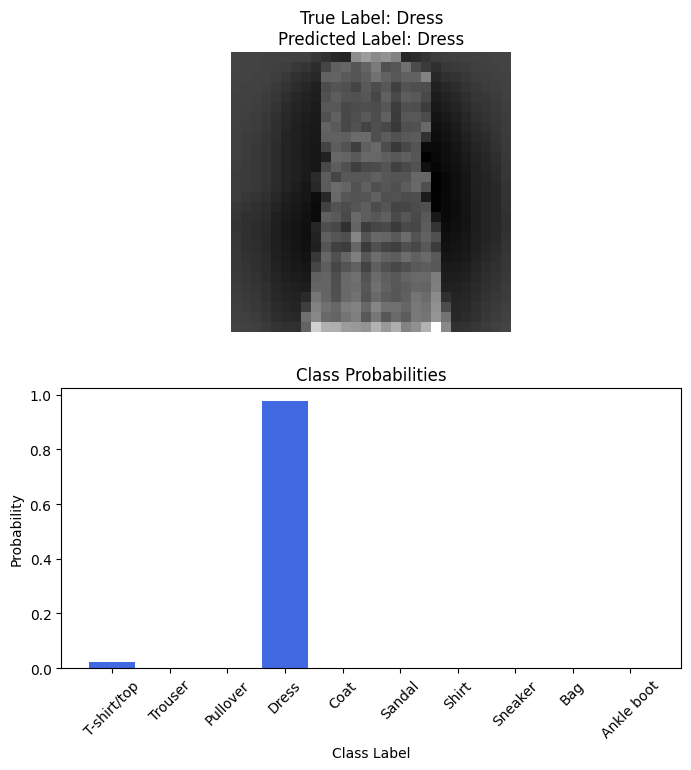

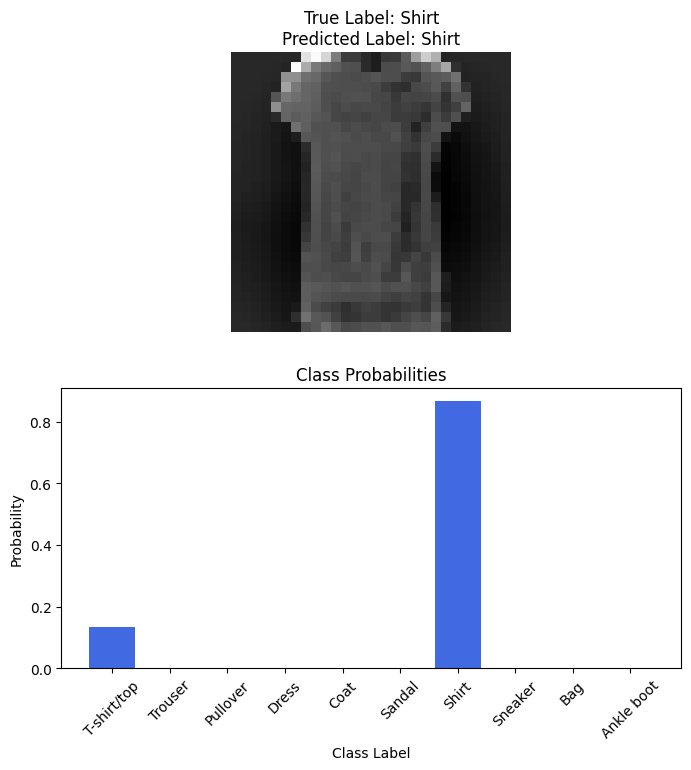

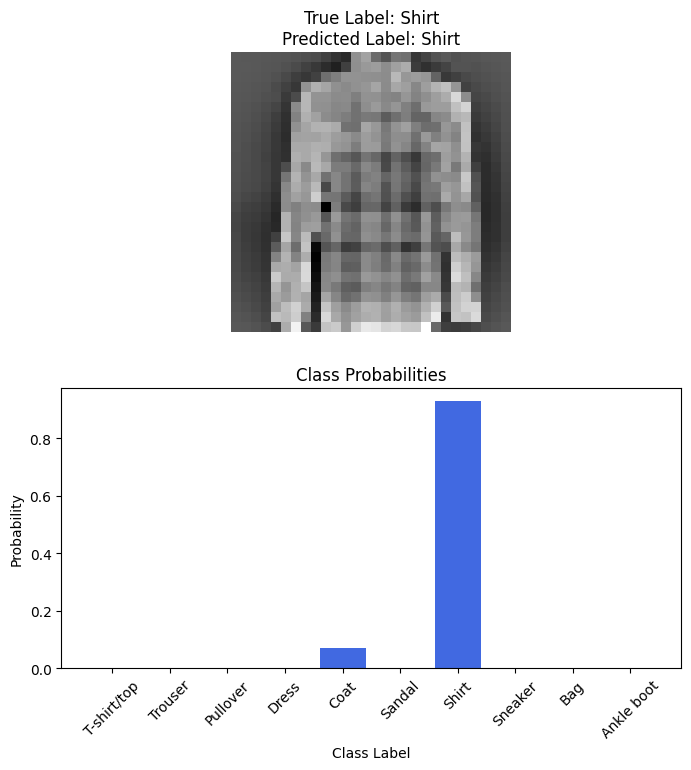

In [18]:
# Function to display an image along with its predicted class and probability as a bar graph
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.squeeze().cpu().numpy()  # Convert image tensor to NumPy array and remove channel dimension

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {class_labels[true_label]}\nPredicted Label: {class_labels[predicted_label]}')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

# Set the model to evaluation mode
model_5.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(fashion_X_test_cnn), num_samples_to_display, replace=False)

# Assuming you have a list of class labels for Fashion MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in random_indices:
    image = fashion_X_test_cnn[i].unsqueeze(0).to(device)  # Move image to the GPU
    true_label = fashion_y_test[i].item()

    with torch.no_grad():
        test_output = model_5(image)
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, true_label, predicted_label, probabilities, class_labels)
